In [5]:
# ---- Cellule 1 : imports & setup ----
from pathlib import Path
import json
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Chemin du dossier où se trouvent tes JSON
DATA_DIR = Path("/Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json")

# Dossier pour enregistrer les figures
FIG_DIR = DATA_DIR / "figures"
FIG_DIR.mkdir(exist_ok=True)

print("DATA_DIR =", DATA_DIR)
print("Existe ?", DATA_DIR.exists(), "| Est un dossier ?", DATA_DIR.is_dir())
print("Contenu (aperçu) :", sorted(p.name for p in DATA_DIR.glob('*'))[:10])

# Motif de fichiers (tes fichiers commencent par meteo_*.json)
files = sorted(glob.glob(str(DATA_DIR / "meteo_*.json")))
print("Nombre de fichiers trouvés :", len(files))
print("Aperçu :", files[:3])

DATA_DIR = /Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json
Existe ? True | Est un dossier ? True
Contenu (aperçu) : ['.ipynb_checkpoints', '.venv', 'Part4.ipynb', 'figures', 'meteo_20251110_141916.json', 'meteo_20251110_173802.json', 'meteo_20251111_043802.json', 'meteo_20251111_053802.json', 'meteo_20251111_063801.json', 'meteo_20251111_073802.json']
Nombre de fichiers trouvés : 7
Aperçu : ['/Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/meteo_20251110_141916.json', '/Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/meteo_20251110_173802.json', '/Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/meteo_20251111_043802.json']


In [6]:
# ---- Cellule 2 : lecture des JSON et construction du DataFrame ----
rows = []
for fp in files:
    with open(fp, "r") as f:
        j = json.load(f)
        cw = j.get("current_weather", {})
        rows.append({
            "obs_time": cw.get("time"),
            "temperature": cw.get("temperature"),
            "windspeed": cw.get("windspeed"),
            "winddirection": cw.get("winddirection"),
            "timezone": j.get("timezone")
        })

if not rows:
    raise RuntimeError(
        "Aucun enregistrement chargé. Vérifie le motif meteo_*.json et le dossier DATA_DIR."
    )

df = pd.DataFrame(rows)

# Nettoyage / typage
if "obs_time" not in df.columns:
    raise RuntimeError("La colonne 'obs_time' est introuvable dans les données chargées.")

df["obs_time"] = pd.to_datetime(df["obs_time"])   # ISO 8601 -> datetime
df = df.sort_values("obs_time").reset_index(drop=True)

df.head()

,obs_time,temperature,windspeed,winddirection,timezone
0,2025-11-10 14:15:00,12.1,14.9,172,GMT
1,2025-11-10 17:30:00,11.6,11.2,195,GMT
2,2025-11-11 04:30:00,9.6,10.5,186,GMT
3,2025-11-11 05:30:00,10.1,9.1,189,GMT
4,2025-11-11 06:30:00,10.4,8.6,195,GMT


In [8]:
# ---- Cellule 3 : stats rapides ----
print("Période couverte :", df["obs_time"].min(), "→", df["obs_time"].max())
print()

# describe sans paramètre (car pandas 2.3 ne le supporte pas)
print(df[["temperature", "windspeed"]].describe())

Période couverte : 2025-11-10 14:15:00 → 2025-11-11 08:30:00

       temperature  windspeed
count     7.000000   7.000000
mean     10.914286  10.142857
std       0.898941   2.411678
min       9.600000   7.600000
25%      10.250000   8.850000
50%      11.200000   9.100000
75%      11.500000  10.850000
max      12.100000  14.900000


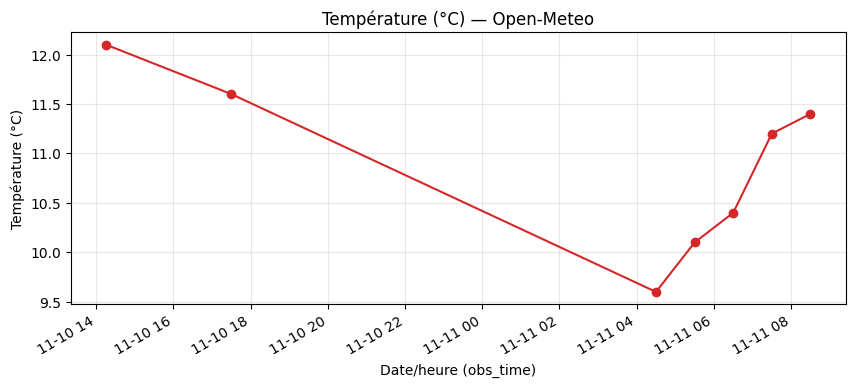

✅ Figure enregistrée : /Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/figures/temp_line.png


In [9]:
# ---- Cellule 4 : courbe de température ----
plt.figure(figsize=(10, 4))
plt.plot(df["obs_time"], df["temperature"], marker="o", color="tab:red")
plt.title("Température (°C) — Open-Meteo")
plt.xlabel("Date/heure (obs_time)")
plt.ylabel("Température (°C)")
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()

out = FIG_DIR / "temp_line.png"
plt.savefig(out, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Figure enregistrée :", out)

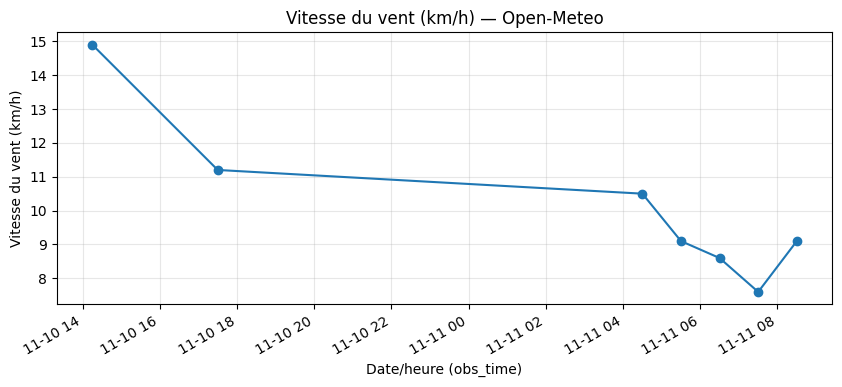

✅ Figure enregistrée : /Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/figures/wind_line.png


In [10]:
# ---- Cellule 5 : courbe de vitesse du vent ----
plt.figure(figsize=(10, 4))
plt.plot(df["obs_time"], df["windspeed"], marker="o", color="tab:blue")
plt.title("Vitesse du vent (km/h) — Open-Meteo")
plt.xlabel("Date/heure (obs_time)")
plt.ylabel("Vitesse du vent (km/h)")
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()

out = FIG_DIR / "wind_line.png"
plt.savefig(out, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Figure enregistrée :", out)

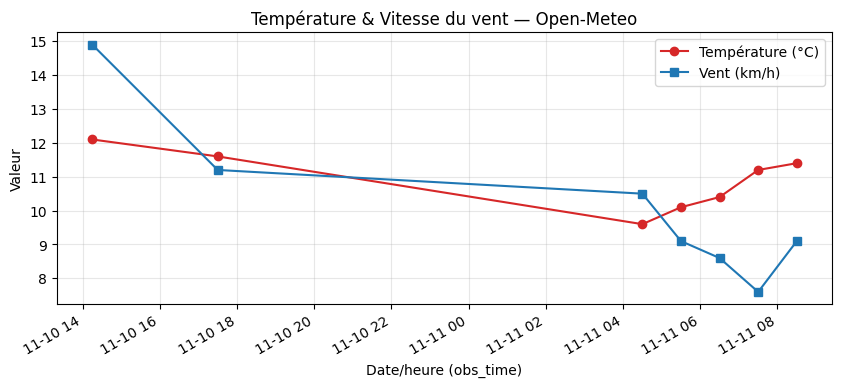

✅ Figure enregistrée : /Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/figures/temp_wind_line.png


In [11]:
# ---- Cellule 6 : température & vent sur le même graphique ----
plt.figure(figsize=(10, 4))
plt.plot(df["obs_time"], df["temperature"], marker="o", color="tab:red", label="Température (°C)")
plt.plot(df["obs_time"], df["windspeed"], marker="s", color="tab:blue", label="Vent (km/h)")
plt.title("Température & Vitesse du vent — Open-Meteo")
plt.xlabel("Date/heure (obs_time)")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()

out = FIG_DIR / "temp_wind_line.png"
plt.savefig(out, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Figure enregistrée :", out)

In [12]:
# ---- Cellule 7 : export CSV ----
csv_out = DATA_DIR / "meteo_clean.csv"
df.to_csv(csv_out, index=False)
print("✅ Données exportées vers :", csv_out)

✅ Données exportées vers : /Users/leosohrabi/Documents/M2 25-26/5CLOU - Data Cloud/Meteo_json/meteo_clean.csv
